<a href="https://colab.research.google.com/github/Ahumuza24/APP-MODEL/blob/main/final_APP_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt


In [18]:

 from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [20]:
data = pd.read_csv("/content/drive/MyDrive/Iraqi Student Performance Prediction.csv")

In [ ]:
print(data.head())

   Student_ID   Sex Social Status  Age Governorate Living Mother education  \
0           1  Male        single    2     baghdad   city        secondary   
1           2  Male        single    3     baghdad   city           medium   
2           3  Male        single    2     baghdad   city       Illiterate   
3           4  Male       coupled    3     baghdad   city               ba   
4           5  Male        single    2     baghdad   city        secondary   

  Father education Family member Education Father Alive  ... economy/bio  \
0        secondary                     yes          yes  ...          70   
1           higher                     yes          yes  ...          87   
2        secondary                      no          yes  ...          58   
3               ba                     yes          yes  ...          92   
4        secondary                     yes          yes  ...          60   

   Avg1 Islamea.1 arabic.1 english.1 math.1 physics.1 chemistry.1  \
0    

In [ ]:
data = pd.get_dummies(data, columns=['Sex', 'Social Status', 'Governorate', 'Living', 'Mother education', 'Father education', 'Family member Education', 'Father Alive', 'Mother Alive', 'Parent Apart', 'The Guardian', 'Family Relationship', 'Father Job', 'Mother Job', 'Education Fee', 'Secondary Job', 'Home Ownership', 'Study Room', 'Family Economic Level', 'You  chronic disease', 'Family Chronic Disease', 'Specialization', 'Study willing', 'Reason of study', 'Attendance', 'Failure Year', 'Higher Education Willing', 'References Usage', 'Transport', 'Holiday Effect', 'Worry Effect', 'Parent Meeting'])

In [ ]:
print(data)

     Student_ID  Age  Family Size  Internet Usage  TV Usage  Sleep Hour  \
0             1    2            0               1         0           1   
1             2    3            1               2         0           2   
2             3    2            0               2         0           2   
3             4    3            0               0         0           1   
4             5    2            1               1         0           1   
..          ...  ...          ...             ...       ...         ...   
115         116    2            1               0         0           1   
116         117    3            2               0         0           1   
117         118    2            1               0         0           0   
118         119    4            1               0         0           2   
119         120    2            2               0         0           1   

     Study Hour  Arrival Time  Islamea  arabic  ...  References Usage_no  \
0             3        

In [ ]:
target = data['Avg1']
features = data.drop(columns=['Avg1'])

In [ ]:
features = (features - features.mean()) / features.std()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [ ]:
class GNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
input_dim = X_train.shape[1]  # Number of features
hidden_dim = 64  # Hidden layer size
output_dim = 1  # Output size
model = GNN(input_dim, hidden_dim, output_dim)


In [ ]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convert data to DataLoader for batching
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

In [ ]:
# Training the model
from sklearn.metrics import r2_score

epochs = 500
train_losses = []
train_accuracies = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    y_true = []
    y_pred = []

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Store predictions for computing accuracy
        y_true.extend(labels.numpy())
        y_pred.extend(outputs.squeeze().detach().numpy())

    train_losses.append(running_loss / len(train_loader))

    # Compute R-squared
    r2 = r2_score(y_true, y_pred)
    train_accuracies.append(r2)

    print(f'Epoch {epoch+1}/{epochs}, Loss: {train_losses[-1]}, Accuracy: {train_accuracies[-1]}')




Epoch 1/500, Loss: 4503.881103515625, Accuracy: -18.41993236558233
Epoch 2/500, Loss: 4399.156005859375, Accuracy: -18.373142384650954
Epoch 3/500, Loss: 4575.06982421875, Accuracy: -18.325355216603082
Epoch 4/500, Loss: 4569.693115234375, Accuracy: -18.279683934034658
Epoch 5/500, Loss: 4459.90087890625, Accuracy: -18.234858458123142
Epoch 6/500, Loss: 4433.22509765625, Accuracy: -18.187840969983423
Epoch 7/500, Loss: 4555.77978515625, Accuracy: -18.138416869356284
Epoch 8/500, Loss: 4527.923583984375, Accuracy: -18.088845454362705
Epoch 9/500, Loss: 4523.4404296875, Accuracy: -18.037761024279643
Epoch 10/500, Loss: 4452.410400390625, Accuracy: -17.98469907983427
Epoch 11/500, Loss: 4509.729736328125, Accuracy: -17.929941299697376
Epoch 12/500, Loss: 4377.554931640625, Accuracy: -17.873774123829737
Epoch 13/500, Loss: 4442.911376953125, Accuracy: -17.813816856035494
Epoch 14/500, Loss: 4364.510009765625, Accuracy: -17.75386658871178
Epoch 15/500, Loss: 4549.29736328125, Accuracy: -17.

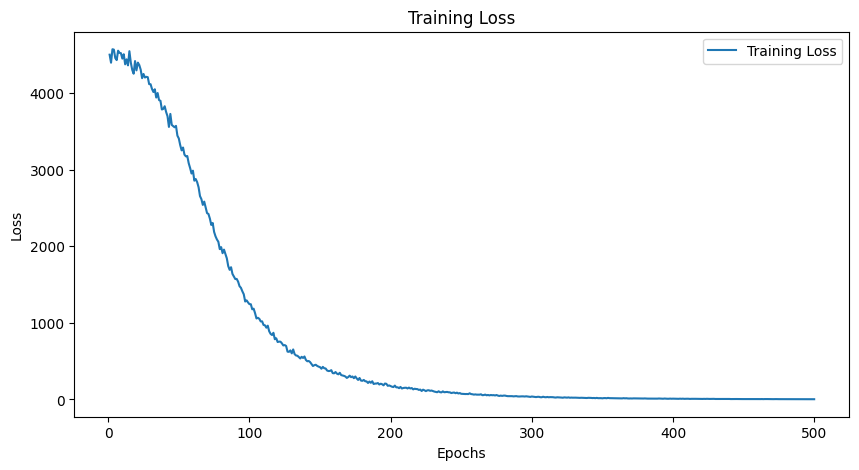

In [ ]:
# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

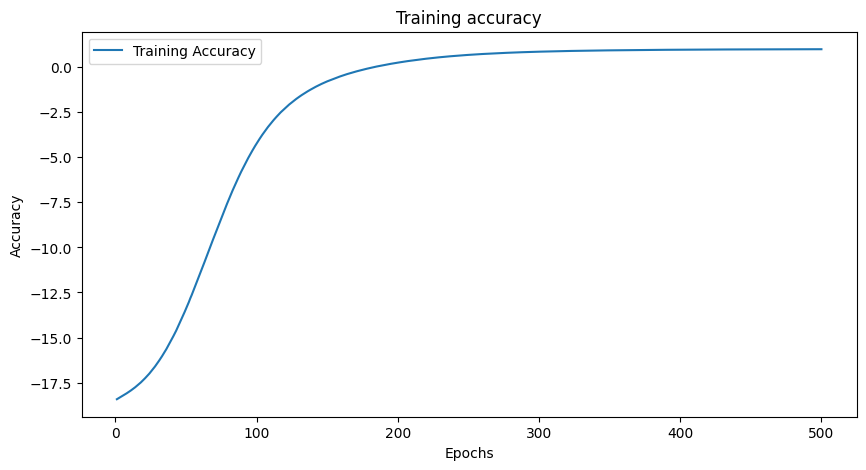

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy')
plt.legend()
plt.show()

Test Loss: 294.8787536621094


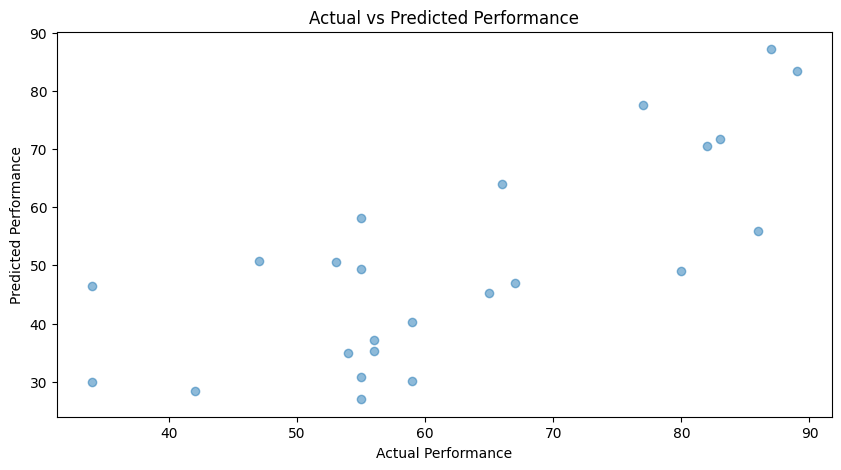

In [ ]:
# Evaluation
model.eval()
with torch.no_grad():
    predicted = model(X_test_tensor)
    test_loss = criterion(predicted.squeeze(), y_test_tensor)
    print(f'Test Loss: {test_loss.item()}')

    # Visualize predicted vs actual
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, predicted, alpha=0.5)
    plt.xlabel('Actual Performance')
    plt.ylabel('Predicted Performance')
    plt.title('Actual vs Predicted Performance')
    plt.show()

In [ ]:
# Print final loss and accuracy
final_loss = train_losses[-1]
final_accuracy = train_accuracies[-1]

print(f'Final Loss: {final_loss}')
print(f'Final Accuracy: {final_accuracy}')


Final Loss: 2.23858779668808
Final Accuracy: 0.989678717111919


In [ ]:
# Save the trained model
torch.save(model.state_dict(), 'student_performance_model.pth')

# Load the saved model
loaded_model = GNN(input_dim, hidden_dim, output_dim)
loaded_model.load_state_dict(torch.load('student_performance_model.pth'))
loaded_model.eval()

GNN(
  (fc1): Linear(in_features=103, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
)